# **Trabalho Bimestral - Aprendizado de Máquina Supervisionado - Árvores de Decisão**


Link do Repositório:

https://github.com/Felip-Oliv/Data_Cience.git



Link do Dataset:

https://drive.google.com/file/d/1BkClQaTYfF4ItFX8R8Ei3skLycKuVnYv/view?usp=share_link

Link do Dicionário de Dados:

https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?resource=download

Integrantes:

Aramis Chang Chain, RGM: 8813440250

Luiz Felipe, RGM: 8813216082

Instituição: Universidade Positivo

Curso: Sistemas de Informação

Matéria: Data Science

Turma: BSI - Quarta

Professora: https://github.com/marycamila184

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a intensidade de bebida alcoólica consumida nos finais de semana pelos estudantes de matemática dos colégios Gabriel Pereira e Mousinho da Silveira

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?resource=download

# **PRÉ-PROCESSAMENTO**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/student-mat.csv',
                  sep=',', encoding='latin-1')



In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.shape

(395, 33)

## **Limpeza de dados**

Foi retirada algumas colunas com muitas variantes e as que não fazem muito sentido para o estudo:

In [ ]:
lista_colunas_removidas = [
'school','Medu', 'Fedu', 'famsize', 'Mjob', 'Fjob', 'reason', 'traveltime', 'schoolsup', 'paid', 'nursery', 'freetime', 'absences', 'G1', 'G2', 'G3'
]

df = df.drop(columns = lista_colunas_removidas)

In [ ]:
df.head()

,sex,age,address,Pstatus,guardian,studytime,failures,famsup,activities,higher,internet,romantic,famrel,goout,Dalc,Walc,health
0,F,18,U,A,mother,2,0,no,no,yes,no,no,4,4,1,1,3
1,F,17,U,T,father,2,0,yes,no,yes,yes,no,5,3,1,1,3
2,F,15,U,T,mother,2,3,no,no,yes,yes,no,4,2,2,3,3
3,F,15,U,T,mother,3,0,yes,yes,yes,yes,yes,3,2,1,1,5
4,F,16,U,T,father,2,0,yes,no,yes,no,no,4,2,1,2,5


In [ ]:
df.dtypes

sex           object
age            int64
address       object
Pstatus       object
guardian      object
studytime      int64
failures       int64
famsup        object
activities    object
higher        object
internet      object
romantic      object
famrel         int64
goout          int64
Dalc           int64
Walc           int64
health         int64
dtype: object

## **Transformando as variáveis categóricas nominais em variáveis categóricas ordinais**

In [ ]:
df2 = pd.DataFrame.copy(df)

Mudar os dados "object" para "int64" das seguintes colunas:

-sex

In [ ]:
df2['sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df2['sex'].replace({'F':0, 'M': 1}, inplace=True)

-address

In [ ]:
df2['address'].unique()

array(['U', 'R'], dtype=object)

In [ ]:
df2['address'].replace({'U':0, 'R': 1}, inplace=True)

-Pstatus

In [ ]:
df2['Pstatus'].unique()

array(['A', 'T'], dtype=object)

In [ ]:
df2['Pstatus'].replace({'A':0, 'T': 1}, inplace=True)

-guardian

In [ ]:
df2['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [ ]:
df2['guardian'].replace({'mother':0, 'father': 1, 'other':2}, inplace=True)

-famsup

In [ ]:
df2['famsup'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df2['famsup'].replace({'no':0, 'yes': 1}, inplace=True)

-activities 

In [ ]:
df2['activities'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df2['activities'].replace({'no':0, 'yes': 1}, inplace=True)

-higher

In [ ]:
df2['higher'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df2['higher'].replace({'yes':0, 'no': 1}, inplace=True)

-internet

In [ ]:
df2['internet'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df2['internet'].replace({'no':0, 'yes': 1}, inplace=True)

-romantic 

In [ ]:
df2['romantic'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df2['romantic'].replace({'no':0, 'yes': 1}, inplace=True)

In [ ]:
df2.head()

,sex,age,address,Pstatus,guardian,studytime,failures,famsup,activities,higher,internet,romantic,famrel,goout,Dalc,Walc,health
0,0,18,0,0,0,2,0,0,0,0,0,0,4,4,1,1,3
1,0,17,0,1,1,2,0,1,0,0,1,0,5,3,1,1,3
2,0,15,0,1,0,2,3,0,0,0,1,0,4,2,2,3,3
3,0,15,0,1,0,3,0,1,1,0,1,1,3,2,1,1,5
4,0,16,0,1,1,2,0,1,0,0,0,0,4,2,1,2,5


In [ ]:
df2.dtypes

sex           int64
age           int64
address       int64
Pstatus       int64
guardian      int64
studytime     int64
failures      int64
famsup        int64
activities    int64
higher        int64
internet      int64
romantic      int64
famrel        int64
goout         int64
Dalc          int64
Walc          int64
health        int64
dtype: object

In [ ]:
df2.shape

(395, 17)

## **LEGENDA**

**sex** = Sexo dos estudantes (0 =F = feminino, 1 = M = masculino)

**age** = Idade dos estudantes (15 a 22 anos)

**address** = Tipo de endereço do estudantes (0 = U = Urbano, 1 = R = Rural)

**Pstatus** = Estado de coabitação dos pais (0 = T = Juntos, 1 = A = separados)

**guardian** = Guardião legal do estudante (0 = mother(mãe), 1 = father(pai), 2 = other(outros))

**studytime** = Tempo estudado por semana (1 = <2 hours, 2 = 2 a 5 horas, 3 = 5 a 10 horas, 4 = >10 horas)

**failures** = Número de reprovações anteriores (n se 1<=n<3, senão 4)

**famsup** = Apoio educacional familiar (0 = yes(sim), 1 = no(não))

**activities** = Atividades extracurriculares (0 = yes(sim), 1 = no(não))

**higher** = Quer cursar o ensino superior (0 = yes(sim), 1 = no(não))

**internet** = Acesso internet em casa (0 = yes(sim), 1 = no(não))

**romantic** = Com um relacionamento amoroso (0 = yes(sim), 1 = no(não))

**famrel** = Qualidade das relações familiares (1 = muito ruim a 5 = excelente)

**goout** = Sair com amigos (1 = muito baixo a 5 = muito alto)

**Dalc** = Consumo de álcool no dia de trabalho (1 = muito baixo a 5 = muito alto)

**Walc** = consumo de álcool no final de semana (1 = muito baixo a 5 = muito alto)

**health** = estado de saúde atual (1 = muito ruim a 5 = muito bom)




## **ATRIBUTOS PREVISORES E ALVO**



Pelo nosso objetivo ser a intensidade de bebida alcoólica consumida nos finais de semana pelos estudantes de matemática, a coluna 16 (Walc) será o "Alvo"

In [ ]:
df2.head()

,sex,age,address,Pstatus,guardian,studytime,failures,famsup,activities,higher,internet,romantic,famrel,goout,Dalc,Walc,health
0,0,18,0,0,0,2,0,0,0,0,0,0,4,4,1,1,3
1,0,17,0,1,1,2,0,1,0,0,1,0,5,3,1,1,3
2,0,15,0,1,0,2,3,0,0,0,1,0,4,2,2,3,3
3,0,15,0,1,0,3,0,1,1,0,1,1,3,2,1,1,5
4,0,16,0,1,1,2,0,1,0,0,0,0,4,2,1,2,5


In [ ]:
previsores = df2.iloc[:, 0:17].values

In [ ]:
previsores

array([[ 0, 18,  0, ...,  1,  1,  3],
       [ 0, 17,  0, ...,  1,  1,  3],
       [ 0, 15,  0, ...,  2,  3,  3],
       ...,
       [ 1, 21,  1, ...,  3,  3,  3],
       [ 1, 18,  1, ...,  3,  4,  5],
       [ 1, 19,  0, ...,  3,  3,  5]])

In [ ]:
previsores.shape

(395, 17)

In [ ]:
alvo = df2.iloc[:, 16].values

In [ ]:
alvo

array([3, 3, 3, 5, 5, 5, 3, 1, 1, 5, 2, 4, 5, 3, 3, 2, 2, 4, 5, 5, 1, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 2, 5, 5, 4, 5, 5, 2, 3, 5, 5, 1,
       5, 5, 3, 2, 5, 3, 4, 5, 5, 5, 1, 2, 1, 5, 5, 5, 4, 5, 1, 4, 2, 1,
       3, 5, 4, 3, 5, 3, 5, 5, 5, 5, 1, 3, 3, 3, 3, 5, 5, 4, 4, 5, 2, 1,
       3, 5, 4, 1, 2, 1, 4, 1, 4, 5, 1, 3, 4, 4, 5, 2, 1, 4, 3, 5, 1, 4,
       4, 2, 5, 3, 5, 5, 2, 5, 5, 4, 1, 5, 5, 5, 5, 5, 1, 5, 4, 4, 5, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 3, 2, 5, 1, 5, 5, 3, 5, 5, 5, 4, 5, 3, 4,
       4, 1, 5, 4, 3, 5, 5, 3, 5, 2, 5, 2, 4, 3, 4, 3, 2, 3, 5, 3, 4, 4,
       5, 4, 3, 2, 3, 3, 5, 1, 1, 4, 3, 5, 3, 3, 2, 3, 5, 5, 3, 5, 5, 3,
       2, 3, 2, 4, 1, 3, 5, 5, 4, 1, 5, 4, 3, 3, 4, 5, 3, 1, 1, 4, 3, 4,
       5, 5, 3, 4, 5, 4, 3, 3, 3, 3, 3, 1, 2, 1, 5, 2, 4, 5, 3, 2, 5, 4,
       3, 5, 3, 4, 2, 1, 5, 5, 5, 2, 5, 3, 5, 5, 4, 1, 4, 2, 2, 3, 3, 4,
       3, 1, 5, 4, 5, 3, 5, 2, 3, 1, 1, 5, 5, 3, 4, 1, 5, 3, 3, 4, 5, 4,
       2, 3, 2, 2, 5, 3, 5, 3, 4, 5, 2, 2, 3, 1, 4,

In [ ]:
alvo.shape

(395,)

## **Análise das escalas dos atributos (Escalonamento)**

Padronização (utiliza a média e o desvio padrão como referência).

In [ ]:
df2.describe()

,sex,age,address,Pstatus,guardian,studytime,failures,famsup,activities,higher,internet,romantic,famrel,goout,Dalc,Walc,health
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.473418,16.696203,0.222785,0.896203,0.389873,2.035443,0.334177,0.612658,0.508861,0.050633,0.832911,0.334177,3.944304,3.108861,1.481013,2.291139,3.554430
std,0.499926,1.276043,0.416643,0.305384,0.633176,0.839240,0.743651,0.487761,0.500555,0.219525,0.373528,0.472300,0.896659,1.113278,0.890741,1.287897,1.390303
min,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,16.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,1.000000,1.000000,3.000000
50%,0.000000,17.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,3.000000,1.000000,2.000000,4.000000
75%,1.000000,18.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.000000,4.000000,2.000000,3.000000,5.000000
max,1.000000,22.000000,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [ ]:
previsores_esc

array([[-0.94817639,  1.02304645, -0.53539233, ..., -0.54069866,
        -1.00378921, -0.39928949],
       [-0.94817639,  0.23837976, -0.53539233, ..., -0.54069866,
        -1.00378921, -0.39928949],
       [-0.94817639, -1.33095364, -0.53539233, ...,  0.58338539,
         0.55109996, -0.39928949],
       ...,
       [ 1.05465609,  3.37704655,  1.86778916, ...,  1.70746944,
         0.55109996, -0.39928949],
       [ 1.05465609,  1.02304645,  1.86778916, ...,  1.70746944,
         1.32854454,  1.04106985],
       [ 1.05465609,  1.80771315, -0.53539233, ...,  1.70746944,
         0.55109996,  1.04106985]])

In [ ]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.948176,1.023046,-0.535392,-2.938392,-0.616523,-0.042286,-0.449944,-1.257656,-1.017881,-0.23094,-2.232677,-0.708450,0.062194,0.801479,-0.540699,-1.003789,-0.399289
1,-0.948176,0.238380,-0.535392,0.340322,0.964819,-0.042286,-0.449944,0.795130,-1.017881,-0.23094,0.447893,-0.708450,1.178860,-0.097908,-0.540699,-1.003789,-0.399289
2,-0.948176,-1.330954,-0.535392,0.340322,-0.616523,-0.042286,3.589323,-1.257656,-1.017881,-0.23094,0.447893,-0.708450,0.062194,-0.997295,0.583385,0.551100,-0.399289
3,-0.948176,-1.330954,-0.535392,0.340322,-0.616523,1.150779,-0.449944,0.795130,0.982433,-0.23094,0.447893,1.411533,-1.054472,-0.997295,-0.540699,-1.003789,1.041070
4,-0.948176,-0.546287,-0.535392,0.340322,0.964819,-0.042286,-0.449944,0.795130,-1.017881,-0.23094,-2.232677,-0.708450,0.062194,-0.997295,-0.540699,-0.226345,1.041070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.054656,2.592380,-0.535392,-2.938392,2.546160,-0.042286,2.242901,0.795130,-1.017881,-0.23094,-2.232677,-0.708450,1.178860,0.801479,2.831553,2.105989,0.320890
391,1.054656,0.238380,-0.535392,0.340322,-0.616523,-1.235351,-0.449944,-1.257656,-1.017881,-0.23094,0.447893,-0.708450,-2.171138,1.700867,1.707469,1.328545,-1.119469
392,1.054656,3.377047,1.867789,0.340322,2.546160,-1.235351,3.589323,-1.257656,-1.017881,-0.23094,-2.232677,-0.708450,1.178860,-0.097908,1.707469,0.551100,-0.399289
393,1.054656,1.023046,1.867789,0.340322,-0.616523,-1.235351,-0.449944,-1.257656,-1.017881,-0.23094,0.447893,-0.708450,0.062194,-1.896683,1.707469,1.328545,1.041070


## **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir (gravidade de alcoolismo dos estudantes nos finais de semana).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

## **BASE DE TREINO E TESTE**

Parâmetros train_test_split:   
- arrays: nomes dos atributos previsores e alvo.   
- test_size: tamanho em porcentagem dos dados de teste. default é none.   
- train_size: tamanho em porcentagem dos dados de treinamento.default é none.  
- random_state: nomeação de um estado aleatório.   
- shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
- stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.30, random_state = 0)

In [ ]:
x_treino.shape

(276, 17)

In [ ]:
x_teste.shape

(119, 17)

In [ ]:
y_treino.shape

(276,)

In [ ]:
y_teste.shape

(119,)

# **ÁRVORE DE DECISÃO**

https://scikit-learn.org/stable/modules/tree.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=2)
#arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.5, 0.8333333333333334, 'X[16] <= -0.039\nentropy = 2.14\nsamples = 276\nvalue = [35, 25, 67, 44, 105]'),
 Text(0.25, 0.5, 'X[16] <= -0.759\nentropy = 1.461\nsamples = 127\nvalue = [35, 25, 67, 0, 0]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.98\nsamples = 60\nvalue = [35, 25, 0, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 67\nvalue = [0, 0, 67, 0, 0]'),
 Text(0.75, 0.5, 'X[16] <= 0.681\nentropy = 0.875\nsamples = 149\nvalue = [0, 0, 0, 44, 105]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 44\nvalue = [0, 0, 0, 44, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 105\nvalue = [0, 0, 0, 0, 105]')]

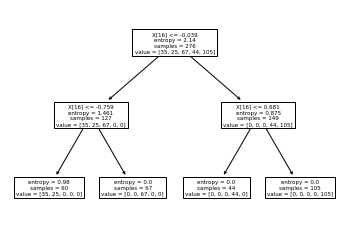

In [ ]:
tree.plot_tree(_arvore)

In [ ]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([4, 5, 5, 1, 5, 3, 4, 4, 5, 1, 4, 5, 1, 3, 1, 5, 5, 3, 5, 3, 4, 4,
       4, 3, 3, 5, 1, 3, 5, 5, 5, 3, 5, 1, 1, 3, 1, 1, 3, 3, 3, 3, 4, 5,
       5, 4, 1, 5, 1, 5, 1, 5, 5, 1, 5, 5, 1, 4, 5, 3, 1, 1, 1, 3, 1, 5,
       1, 5, 1, 4, 4, 1, 4, 5, 5, 3, 5, 5, 3, 1, 1, 4, 4, 5, 4, 5, 5, 1,
       1, 3, 1, 4, 1, 1, 1, 4, 4, 4, 1, 5, 3, 5, 5, 5, 5, 3, 5, 1, 4, 3,
       3, 3, 5, 1, 5, 3, 5, 5, 4])

In [ ]:
y_teste

array([4, 5, 5, 1, 5, 3, 4, 4, 5, 2, 4, 5, 1, 3, 1, 5, 5, 3, 5, 3, 4, 4,
       4, 3, 3, 5, 2, 3, 5, 5, 5, 3, 5, 1, 1, 3, 1, 2, 3, 3, 3, 3, 4, 5,
       5, 4, 2, 5, 2, 5, 2, 5, 5, 2, 5, 5, 2, 4, 5, 3, 1, 2, 2, 3, 2, 5,
       2, 5, 1, 4, 4, 1, 4, 5, 5, 3, 5, 5, 3, 2, 2, 4, 4, 5, 4, 5, 5, 1,
       1, 3, 2, 4, 2, 1, 2, 4, 4, 4, 2, 5, 3, 5, 5, 5, 5, 3, 5, 2, 4, 3,
       3, 3, 5, 2, 5, 3, 5, 5, 4])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 83.19%


In [ ]:
confusion_matrix(y_teste, previsoes_arvore)

array([[12,  0,  0,  0,  0],
       [20,  0,  0,  0,  0],
       [ 0,  0, 24,  0,  0],
       [ 0,  0,  0, 22,  0],
       [ 0,  0,  0,  0, 41]])

In [ ]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           1       0.38      1.00      0.55        12
           2       0.00      0.00      0.00        20
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        41

    accuracy                           0.83       119
   macro avg       0.68      0.80      0.71       119
weighted avg       0.77      0.83      0.79       119



**Análise dados de treino**

In [ ]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([5, 4, 5, 5, 5, 5, 1, 3, 5, 3, 5, 4, 4, 3, 5, 4, 1, 1, 5, 5, 5, 1,
       4, 5, 1, 1, 3, 1, 5, 5, 3, 5, 1, 1, 5, 5, 3, 5, 1, 1, 5, 5, 5, 5,
       5, 5, 1, 5, 5, 3, 1, 3, 1, 4, 3, 5, 5, 3, 1, 1, 5, 5, 4, 5, 4, 5,
       1, 3, 3, 5, 5, 3, 4, 5, 4, 4, 3, 1, 3, 5, 3, 5, 5, 4, 5, 3, 4, 1,
       1, 4, 3, 3, 3, 3, 5, 5, 3, 3, 5, 3, 3, 5, 5, 1, 1, 5, 1, 3, 4, 3,
       3, 5, 5, 3, 5, 3, 4, 5, 4, 3, 1, 1, 5, 4, 3, 5, 5, 5, 5, 1, 5, 4,
       3, 5, 4, 5, 3, 5, 3, 5, 3, 3, 5, 3, 5, 3, 1, 1, 1, 1, 5, 3, 3, 4,
       4, 4, 1, 5, 4, 1, 5, 5, 5, 4, 4, 1, 4, 5, 5, 3, 1, 3, 5, 5, 5, 1,
       3, 4, 4, 1, 3, 3, 4, 4, 3, 1, 4, 3, 3, 3, 5, 1, 1, 3, 5, 1, 3, 4,
       3, 5, 3, 3, 4, 5, 3, 5, 1, 5, 4, 4, 3, 5, 3, 1, 1, 5, 4, 1, 1, 4,
       5, 5, 5, 4, 5, 5, 1, 1, 5, 3, 1, 5, 5, 5, 4, 1, 1, 5, 5, 4, 3, 4,
       3, 1, 5, 3, 5, 5, 1, 5, 1, 5, 1, 1, 1, 4, 5, 1, 5, 3, 3, 5, 1, 5,
       3, 3, 3, 5, 4, 5, 1, 5, 5, 5, 1, 5])

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.9094202898550725

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[ 35,   0,   0,   0,   0],
       [ 25,   0,   0,   0,   0],
       [  0,   0,  67,   0,   0],
       [  0,   0,   0,  44,   0],
       [  0,   0,   0,   0, 105]])

# Resultado da Árvores de Decisão


**Com Max depth 1:**

- Árvore de decisão = 54.62% (treino e teste) - 65 acertos de 119 (geral)
 
- Classificadores de várias classes em uma matriz de confusão e acurácia do modelo *teste* x *treino*:

   - Modelo teste: 

    acurária de "muito baixo": 0/12 = 0%

    acurária de "baixo": 0/20 = 0%

    acurária de "médio": 24/24 = 100%
 
    acurária de "alto": 0/22 = 0%
  
    acurária de "muito alto": 41/41 = 100%
  
   - Modelo treino:

    acurária de "muito baixo": 0/35 = 0%

    acurária de "baixo": 0/25 = 0%

    acurária de "médio": 67/67 = 100%
 
    acurária de "alto": 0/44 = 0%
  
    acurária de "muito alto": 105/105 = 100%

**Com Max depth 2:**
- Árvore de decisão = 83.19% (treino e teste) - 99 acertos de 119 (geral)

- Classificadores de várias classes em uma matriz de confusão e acurácia do modelo *teste* x *treino*:

   - Modelo teste: 

    acurária de "muito baixo": 0/12 = 0%

    acurária de "baixo": 0/20 = 0%

    acurária de "médio": 24/24 = 100%
 
    acurária de "alto": 0/22 = 0%
  
    acurária de "muito alto": 41/41 = 100%
  
   - Modelo treino:

    acurária de "muito baixo": 0/35 = 0%

    acurária de "baixo": 0/25 = 0%

    acurária de "médio": 67/67 = 100%
 
    acurária de "alto": 0/44 = 0%
  
    acurária de "muito alto": 105/105 = 100%

# Conclusão da acurácia de múltiplas classes:

  -  Mesmo apresentando a acurácia da árvore de decisão dando  54,62% do max depth 1 e 83,19% no max depth 2, o cálculo mostra um padrão entre o modelo de teste e treino similar

  - O cálculo revela que a avaliação real da qualidade do modelo requer mais contexto do que o valor de acurácia.

  - Possível conclusão de "Falso Positivo" em que a acurácia da árvore de decisão deixou a desejar pelo seu resultado mas após a acurácia da matriz de conclusão de múltiplas classes, o resultado apresenta o contrário. Um bom exemplo de "*precisão X acurácia*"

  - Best Fit encontrado: max depth = 2

  - Todos os outros "max depth" acimas de 3 marcaram uma acurácia da árvore de decisão de 100%, apresentando um limiar pelo dataset




#Bibliografia de Acurácia de Múltiplas Classes em Matriz de Confusão:
- https://learn.microsoft.com/pt-br/dynamics365/finance/finance-insights/confusion-matrix
